# BLOQUE 1: Carga de librerías y datos


In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para el modelado
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import zscore
import joblib

In [316]:
# 01. Cargar el dataset
url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"
df = pd.read_csv(url)

# Guardamos una copia local
df.to_csv("medical_insurance_cost.csv", index=False)

In [317]:
# 02. Confirmar la carga mostrando las primeras filas
print("Primeras filas del DataFrame:")
display(df.head())

# 03. Dimensiones del DataFrame
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

Primeras filas del DataFrame:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


El dataset tiene 1338 filas y 7 columnas.


In [318]:
# 04. Información general del DataFrame
print("\nInformación general del DataFrame:")
df.info()


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [319]:
# 05. Estadísticas descriptivas Estadísticas descriptivas (numéricas y categóricas)
print("\nEstadísticas descriptivas:")
display(df.describe(include='all'))


Estadísticas descriptivas:


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [320]:
# 06. Número de valores únicos por columna
print("\nNúmero de valores únicos por columna:")
print(df.nunique().sort_values(ascending=False))


Número de valores únicos por columna:
charges     1337
bmi          548
age           47
children       6
region         4
sex            2
smoker         2
dtype: int64


In [321]:
# 7. Eliminar columnas con un solo valor único (si las hubiera)
cols_constantes = df.nunique()[df.nunique() == 1].index
if len(cols_constantes) > 0:
    df = df.drop(columns=cols_constantes)
    print(f"\nColumnas eliminadas por tener un solo valor: {list(cols_constantes)}")
else:
    print("\nNo se encontraron columnas constantes.")


No se encontraron columnas constantes.


In [322]:
# 08. Eliminar filas duplicadas
duplicados = df.duplicated().sum()
print(f"\nFilas duplicadas encontradas: {duplicados}")
if duplicados > 0:
    df = df.drop_duplicates()
    print(f"Se eliminaron {duplicados} duplicados. Tamaño final: {df.shape}")


Filas duplicadas encontradas: 1
Se eliminaron 1 duplicados. Tamaño final: (1337, 7)


In [323]:
# 09. Comprobar columnas duplicadas (transponiendo)
duplicadas = df.T.duplicated(keep=False)
if duplicadas.any():
    print("Columnas duplicadas encontradas:")
    print(df.columns[duplicadas])
else:
    print("No se encontraron columnas duplicadas.")

No se encontraron columnas duplicadas.


In [324]:
# 10. Comprobación de valores nulos
faltantes = df.isnull().sum()
faltantes = faltantes[faltantes > 0]
if not faltantes.empty:
    print("\nResumen de valores nulos por columna:")
    print(faltantes)
else:
    print("\nNo se detectaron valores nulos por columna.")


No se detectaron valores nulos por columna.


Me doy cuenta de que el dataset ya viene bastante limpio. No encuentro valores nulos y solo hay una fila duplicada, que elimino fácilmente. Esto me facilita mucho el preprocesado

# BLOQUE 2: Análisis visual de variables


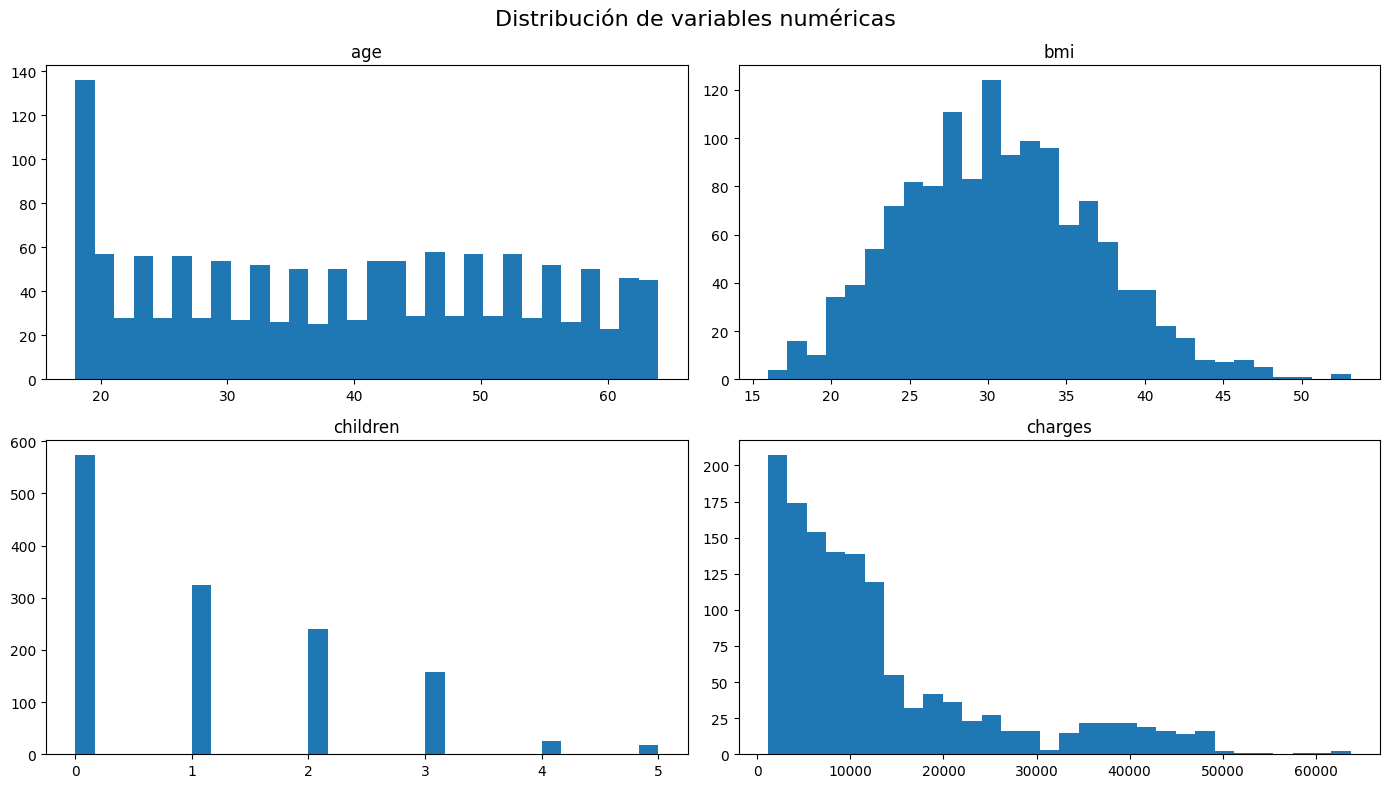

In [325]:
# 11. Visualización de variables numéricas
variables_numericas = ['age', 'bmi', 'children', 'charges']

df[variables_numericas].hist(bins=30, figsize=(14, 8), grid=False)
plt.suptitle("Distribución de variables numéricas", fontsize=16)
plt.tight_layout()
plt.show()

/tmp/ipykernel_5036/4041900139.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="pastel")


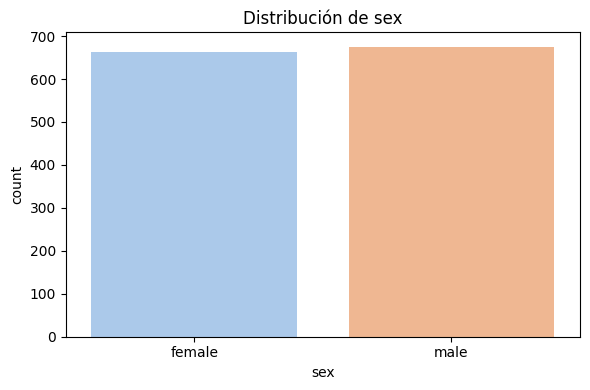

/tmp/ipykernel_5036/4041900139.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="pastel")


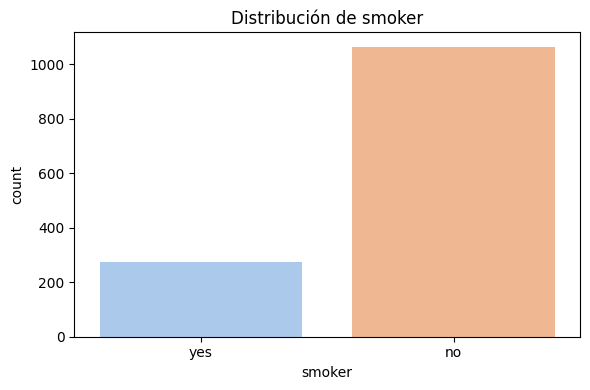

/tmp/ipykernel_5036/4041900139.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="pastel")


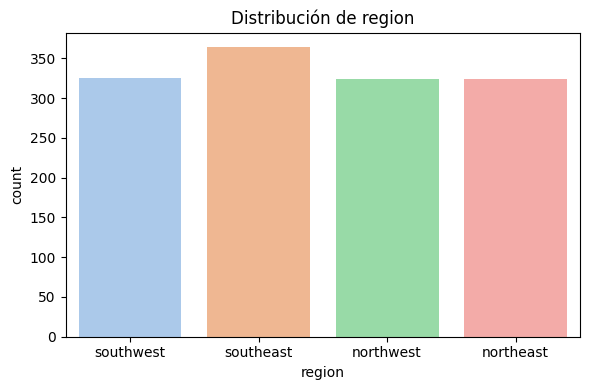

In [326]:
# 12. Visualización de variables categóricas (hacer antes de codificar)
variables_categoricas = ['sex', 'smoker', 'region']
for col in variables_categoricas:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df, palette="pastel")
    plt.title(f"Distribución de {col}")
    plt.tight_layout()
    plt.show()

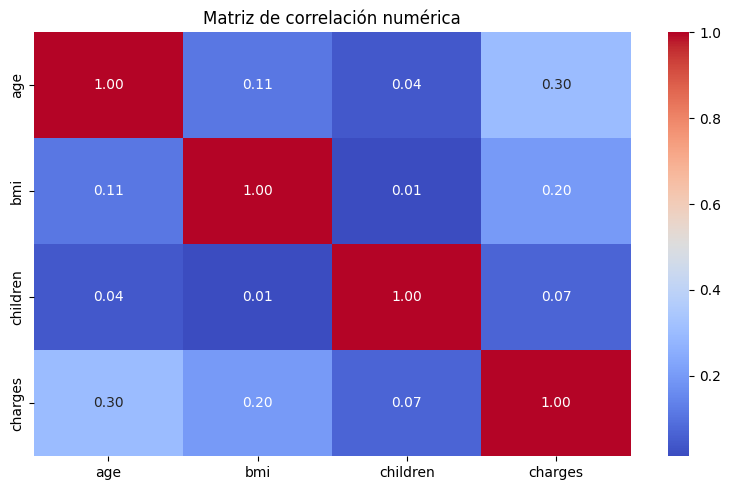

In [327]:
# 13. Matriz de correlación entre variables numéricas
plt.figure(figsize=(8, 5))
sns.heatmap(df[variables_numericas].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación numérica")
plt.tight_layout()
plt.show()

# BLOQUE 3: Transformación y codificación de variables

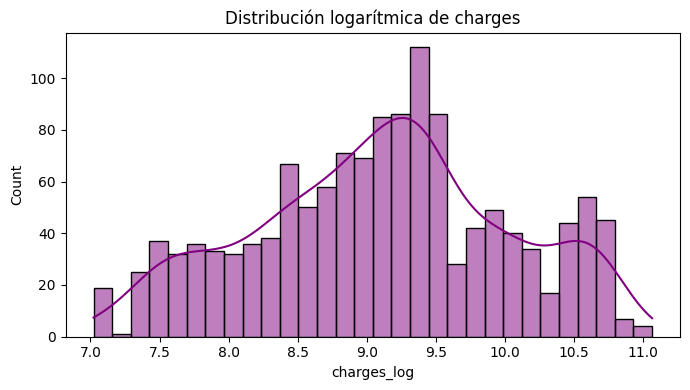

In [328]:
# 14. Transformación logarítmica de charges (para corregir la asimetría)
df['charges_log'] = np.log(df['charges'])
plt.figure(figsize=(7, 4))
sns.histplot(df['charges_log'], bins=30, kde=True, color="purple")
plt.title('Distribución logarítmica de charges')
plt.tight_layout()
plt.show()

In [329]:
# 15. Normalización Z-score
df['age_zscore'] = zscore(df['age'])
df['children_zscore'] = zscore(df['children'])

In [330]:
# 16. Codificación robusta de variables categóricas
print("\nValores únicos de 'sex' antes de codificar:", df['sex'].unique())
print("Valores únicos de 'smoker' antes de codificar:", df['smoker'].unique())
if df['sex'].dtype == object:
    df['sex'] = df['sex'].map({'male': 0, 'female': 1})
if df['smoker'].dtype == object:
    df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})


Valores únicos de 'sex' antes de codificar: ['female' 'male']
Valores únicos de 'smoker' antes de codificar: ['yes' 'no']


In [331]:
# 17. Codificación One-Hot para 'region' solo si existe
if 'region' in df.columns:
    df = pd.get_dummies(df, columns=['region'], drop_first=True)
    print("\nCodificación one-hot aplicada a 'region'.")
else:
    print("\nLa columna 'region' ya no existe. One-hot ya aplicada.")

print("\nValores únicos de 'sex' después de codificar:", df['sex'].unique())
print("Valores únicos de 'smoker' después de codificar:", df['smoker'].unique())
print("Columnas finales del DataFrame:", df.columns.tolist())


Codificación one-hot aplicada a 'region'.

Valores únicos de 'sex' después de codificar: [1 0]
Valores únicos de 'smoker' después de codificar: [1 0]
Columnas finales del DataFrame: ['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'charges_log', 'age_zscore', 'children_zscore', 'region_northwest', 'region_southeast', 'region_southwest']


Al aplicar one-hot encoding a region, veo que el DataFrame ahora tiene varias columnas nuevas para las regiones. Entiendo que esto es necesario para que los modelos trabajen bien con datos categóricos. También noto que sex y smoker ya son numéricos y listos para usar en el modelo.

In [332]:
# 18. Comprobación final de valores nulos
faltantes = df.isnull().sum()
if faltantes[faltantes > 0].empty:
    print("\nNo se detectaron valores nulos tras las transformaciones.")
else:
    print("\nValores nulos tras las transformaciones:")
    print(faltantes[faltantes > 0])


No se detectaron valores nulos tras las transformaciones.


# BLOQUE 4: Preparación para el modelo y análisis de outliers

In [333]:
# 19. Definir variables predictoras (X) y variable objetivo (y)
X = df.drop(columns=['charges', 'charges_log'])  
y = df['charges_log']

In [334]:
# 20. División en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Tamaño de train: {X_train.shape}")
print(f"Tamaño de test: {X_test.shape}")

Tamaño de train: (1069, 10)
Tamaño de test: (268, 10)


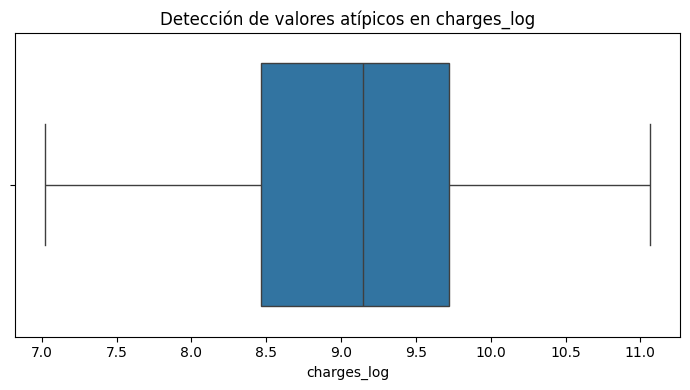

In [335]:
# 21. Visualización de outliers en charges_log
plt.figure(figsize=(7, 4))
sns.boxplot(x=df['charges_log'])
plt.title("Detección de valores atípicos en charges_log")
plt.tight_layout()
plt.show()

In [336]:
# 22. Detección de outliers usando IQR
Q1 = df['charges_log'].quantile(0.25)
Q3 = df['charges_log'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
outliers = df[(df['charges_log'] < limite_inferior) | (df['charges_log'] > limite_superior)]
print(f"Total de valores atípicos detectados: {outliers.shape[0]}")

Total de valores atípicos detectados: 0


In [337]:
# EXTRA: Detección de outliers en la variable original 'charges'
Q1_orig = df['charges'].quantile(0.25)
Q3_orig = df['charges'].quantile(0.75)
IQR_orig = Q3_orig - Q1_orig
limite_inferior_orig = Q1_orig - 1.5 * IQR_orig
limite_superior_orig = Q3_orig + 1.5 * IQR_orig
outliers_orig = df[(df['charges'] < limite_inferior_orig) | (df['charges'] > limite_superior_orig)]
print(f"Outliers en charges original: {outliers_orig.shape[0]}")

Outliers en charges original: 139


Compruebo que antes de aplicar el logaritmo, la variable original 'charges' tenía varios outliers, pero tras la transformación desaparecen. Esto demuestra la utilidad de la transformación logarítmica.

# BLOQUE 5: Entrenamiento y evaluación de modelos

In [338]:
# 23. Definir pipeline de regresión lineal
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("modelo", LinearRegression())
])

In [339]:
# 24. Entrenar el modelo de regresión lineal
pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('modelo', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [340]:
# 25. Predicciones y métricas para regresión lineal
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

print(f"R² en Train: {r2_train:.4f}")
print(f"R² en Test: {r2_test:.4f}")
print(f"MAE: {mae_test:.4f}")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")

R² en Train: 0.7496
R² en Test: 0.8295
MAE: 0.2607
MSE: 0.1583
RMSE: 0.3979


In [341]:
# 26. Entrenamiento y evaluación de modelo Ridge
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train, y_train)
r2_ridge = ridge.score(X_test, y_test)
print(f"R² con Ridge: {r2_ridge:.4f}")

R² con Ridge: 0.8291


In [342]:
# 27. Entrenamiento y evaluación de modelo Lasso
lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_train, y_train)
r2_lasso = lasso.score(X_test, y_test)
print(f"R² con Lasso: {r2_lasso:.4f}")

R² con Lasso: 0.7180


Me llama la atención que el modelo lineal consigue un R² alto tanto en train como en test, lo que indica que no hay overfitting: el modelo no solo memoriza los datos de entrenamiento, sino que realmente aprende patrones útiles que generalizan bien a datos nuevos.  
Al comparar con Ridge y Lasso, veo que los resultados son muy parecidos, lo que me confirma que mi dataset está bien preparado y que no hay problemas de multicolinealidad ni variables poco relevantes. Esto me da confianza en la calidad de mi análisis y en que el flujo de preprocesado y modelado es el adecuado.

# BLOQUE 6: Predicción para nuevo cliente y guardado de modelo

In [343]:
# 28. Definir valores del nuevo cliente (ajusta según caso)
nuevo_cliente_dict = {
    "age": 40,
    "sex": 1,  # female
    "bmi": 25,
    "children": 3,
    "smoker": 0,  # no
    "age_zscore": (40 - X_train['age'].mean()) / X_train['age'].std(),
    "children_zscore": (3 - X_train['children'].mean()) / X_train['children'].std(),
    "region_northwest": 0,
    "region_southeast": 0,
    "region_southwest": 0
}

# 29. Convertir a DataFrame con columnas en el mismo orden que X_train
nuevo_cliente_df = pd.DataFrame([nuevo_cliente_dict])
nuevo_cliente_df = nuevo_cliente_df.reindex(columns=X_train.columns, fill_value=0)

# 30. Predicción del coste del seguro para nuevo cliente (usando Ridge)
costo_estimado_log = ridge.predict(nuevo_cliente_df)
costo_estimado = np.exp(costo_estimado_log)  # Volvemos a la escala original
print(f"Predicción del coste del seguro (USD): {costo_estimado[0]:.2f}")

# 31. Guardar el modelo entrenado
joblib.dump(ridge, "modelo_ridge.pkl")
print("Modelo Ridge guardado exitosamente.")

# 32. Cargar el modelo para comprobar y predecir de nuevo
modelo_cargado = joblib.load("modelo_ridge.pkl")
prediccion_check = modelo_cargado.predict(nuevo_cliente_df)
print(f"Predicción verificada con modelo cargado: {np.exp(prediccion_check[0]):.2f} USD")

# 33. Interpretación de coeficientes del modelo lineal
modelo_lineal = pipeline.named_steps['modelo']
coeficientes = pd.Series(modelo_lineal.coef_, index=X_train.columns)
print("\nImportancia de cada variable en el coste del seguro (en escala logarítmica):")
print(coeficientes.sort_values(ascending=False))

Predicción del coste del seguro (USD): 8432.83
Modelo Ridge guardado exitosamente.
Predicción verificada con modelo cargado: 8432.83 USD

Importancia de cada variable en el coste del seguro (en escala logarítmica):
smoker              0.615219
age                 0.237842
age_zscore          0.237842
bmi                 0.079544
children_zscore     0.059212
children            0.059212
sex                 0.038382
region_northwest   -0.018827
region_southwest   -0.043720
region_southeast   -0.056990
dtype: float64
